## Import the modules


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load the MNIST dataset from Keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
# Finding the shape of individual sample
x_train[0].shape

(28, 28)

hence, each sample is a 28x28 pixel image

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The value ranges 0-255. 0 means the pixel at that point has no intensity and 255 has the highest intensity.

## See the images 

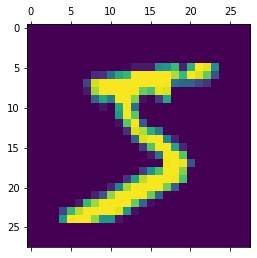

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
# Show first 5 data
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten the training data
we need to convert the two dimensional input data into a single dimensional format for feeding into the model.
This is achieved by a process called flattening. In this process the 28x28 grid image is converted into a single dimensional array of 784(28x28).

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened.shape

(60000, 784)

## PART 1 - Create a simple neural network in keras

In [16]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4659 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2828 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9259


## Evaluate the accuracy on test data

In [17]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2702 - accuracy: 0.9241


[0.2702120840549469, 0.9240999817848206]

## Sample prediction

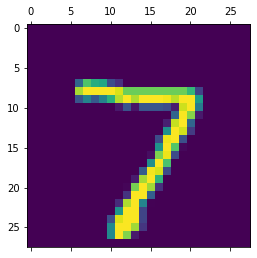

In [18]:
# Show the image
plt.matshow(x_test[0])

In [19]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([1.8693238e-02, 2.5351633e-07, 3.8469851e-02, 9.5759392e-01,
       2.0694137e-03, 1.0928032e-01, 1.0289272e-06, 9.9976790e-01,
       6.6316605e-02, 6.9463903e-01], dtype=float32)

In [20]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

7

In [21]:
# converting y_predicted from whole numbers to integers 
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## Using confusion matrix for validation

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1109,    3,    2,    1,    1,    4,    2,   13,    0],
       [   7,    9,  905,   27,    8,    4,   13,   10,   44,    5],
       [   3,    0,   12,  930,    0,   26,    2,   10,   16,   11],
       [   1,    1,    4,    2,  906,    0,   11,    4,    9,   44],
       [  10,    1,    1,   41,    8,  772,   14,    6,   31,    8],
       [  13,    3,    5,    2,    7,   15,  909,    2,    2,    0],
       [   1,    5,   20,   11,    7,    0,    0,  943,    2,   39],
       [   7,    7,    5,   26,    9,   22,    8,   11,  867,   12],
       [  11,    6,    1,   12,   21,    5,    0,   14,    4,  935]],
      dtype=int32)>

## Using seaborn to make confusion matrix look good

Text(69.0, 0.5, 'Truth')

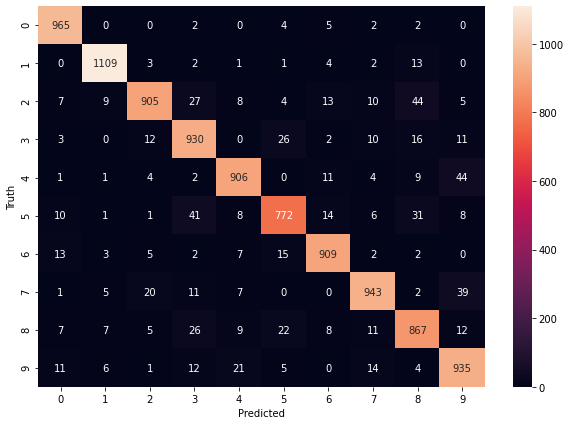

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The confusion matrix gives a clear picture of our prediction.

## How to read the confusion matrix?
- All the diagonal elements are correct predictions, for example we correctly predicted the number 0, 958 times.
- The black cells, value shows the wrong predictions. For each number n in the cell it means that we predicted the value in truth row as the value in predicted column, n times. For Example, 3 was predicted as 2, 17 times.

## PART 2 - Adding a hidden layer

In [24]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2785 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1278 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9835


## Evaluate the accuracy on test set

In [25]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0769 - accuracy: 0.9759


[0.07689543813467026, 0.9758999943733215]

Now we can observe that by adding a hidden layer the accuracy increased from 92% to 97%. 

## Using confusion matrix for validation

Text(69.0, 0.5, 'Truth')

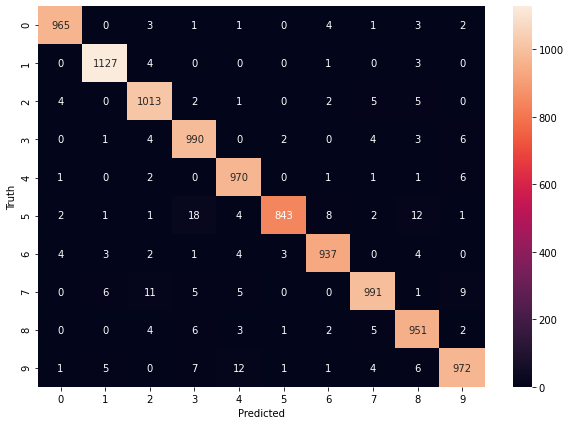

In [26]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Compared to the previous confusion matrix the wrong predictions has gone down. We can see that the diagonal values has increased and the values in black cells has gone down. There are more 0 valued black cells, meaning correct predictions. 

## Bonus Content
flattening out data each time is really tedious, don't worry keras got you covered. Just use the `keras.layers.Flatten` like the example below

In [27]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),                 
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2693 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1230 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9846


## Next step
Try playing around with different activation functions, optimizers, loss functions and epochs to optimize the model. In case of doubt ping me on [twitter](https://twitter.com/milindsoorya)

- Activation Functions - https://keras.io/api/layers/activations/
- Optimizers - https://keras.io/api/optimizers/
- Loss functions - https://keras.io/api/losses/

## Conclusion 
In this article I discussed how to tackle the MNIST Digit Recognistion problem by creating a simple Neural Network.

As a next step, I will do the same problem using Convoluted Neural Network(CNN), for getting that as soon as it drops, please follow me.

Thanks again for reading, have a nice day.